# Python ML and MR Image Processing

## Some notes on jupyter notebooks

1. The page you're seing now is called a Jupyter Notebook. Jupyter notebooks are a simple and convenient way to run python (and few other interpreted languages) on a server through a simple web interface.
2. A notebook is made up of a number of blocks, these can be either text (markdown) block used for documentation (the one you're reading right now), as well as code blocks. 
3. The code blocks can be run by either pressing the small "play" button, or by pressing  the `Ctrl+Enter` key shortcut.
4. Each block can be executed at any given point, and their order in which they are arranged in the notebook is not necessarily the same as the order in which you run them.
5. all code run on the same namespace: if you define a variable/function/object in a block, the same variable/funciton/object will also be available to all other blocks provided that you execute the block.

## Some tips

1. please add as many code or text blocks as you need!
2. Use the text blocks to explain what you're trying to do, and the code block to actually do it!
3. the notebook is a sandbox: feel free to experiment! you can execute a code block as many time as you want, redefine variables and functions, change, tinker, explore!
4. have fun!


## Setup the Data

You must execute the following block in order to be able to retrieve the png files provided...

the code block below will:

1. import the `google.colab.drive` library which is used to link a google drive to the notebook
2. `mount the drive`, which is the command used to link a network file storage (think of it as a usb hard drive) to the notebook
3. ask for a token to be provided in order to perform the necessary authentication; please follow the instructions
4. if things don't work, please let us know!

Once the operation above is executed, the data will be available at `gdrive/Team Drives/ml_eng`

Few more notes:

1. dont feel intimidated by this: just execute the block and then you can forget about it!
2. if you haven't started the python interpreter yet, the notebook will warn you that a it will be connecting to a new python kernel; don't worry about it!
3. in case you're asked, make sure you select python 3.6 or above


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## The GT data

The data provided consists of 3 MR scans of the chest. the scans consists of a number of images "slicing" the patient, a little like a loaf of bread. The slices are all parallel to each other and at uniform distance from each other.

Each pixel of each scan image has been labelled in order to locate the heart. Two labels are used: 

1. label one refer to pixel showing the cardiac blood (ventricles, atria and the main vessel),
2. label two denotes myocardium pixels (the cardiac muscle)

the labels are stored as png images as well as the slices: in the label images, the pixel intensity correspond to the label itself. For example, a pixel in the label image may contain either `0` for a background pixel, `1` for a blood pool pixel or `2` for the myocardium.

in the code block below, we're defining the data prefix (the path to the data stored on the gdrive), and then listing the first 10 files in the directory

In [0]:
import os

Prefix = "gdrive/Shared drives/ml_eng_009"
# Prefix = "gdrive/Team Drives/ml_eng"
Prefix_data = os.path.join(Prefix, "data")

for name in os.listdir(Prefix_data):
  print(name)

file_001_013_img.png
file_001_011_lab.png
file_001_012_img.png
file_001_014_img.png
file_001_015_img.png
file_001_019_img.png
file_001_017_img.png
file_001_016_lab.png
file_001_018_lab.png
file_001_017_lab.png
file_001_018_img.png
file_001_016_img.png
file_001_015_lab.png
file_001_019_lab.png
file_001_020_img.png
file_001_021_img.png
file_001_023_img.png
file_001_021_lab.png
file_001_022_lab.png
file_001_022_img.png
file_001_020_lab.png
file_001_024_img.png
file_001_023_lab.png
file_001_024_lab.png
file_001_025_img.png
file_001_028_lab.png
file_001_027_lab.png
file_001_025_lab.png
file_001_027_img.png
file_001_028_img.png
file_001_026_img.png
file_001_026_lab.png
file_001_029_img.png
file_001_029_lab.png
file_001_030_img.png
file_001_030_lab.png
file_001_034_lab.png
file_001_032_lab.png
file_001_032_img.png
file_001_033_lab.png
file_001_033_img.png
file_001_034_img.png
file_001_031_lab.png
file_001_031_img.png
file_001_035_img.png
file_001_035_lab.png
file_001_038_img.png
file_001_036_

## GT structure

The ground Truth data (GT) is stored as 16 bits png images; the filenames take the form:

```
file_<scan_number>_<slice_number>_<type>.png
```

where the `<type>` refer to either `img` for the original scan images, while `lab` for the labels

So, for example, the filename for the tenth slice of scan 3 is `file_003_010_img.png`, while its corresponding labels are stored in file `file_003_010_lab.png`

In the code block below, an image and its labels are loaded and displayed.

<class 'imageio.core.util.Array'> (384, 384)
<class 'imageio.core.util.Array'> (384, 384)
(384, 384, 1)
labels in the image [0 1 2]
max: 2132
min: 0
std: 362.04487798019625


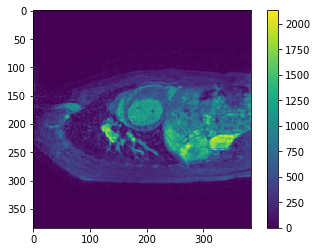

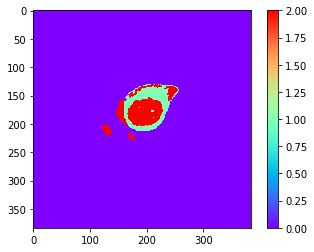

In [0]:
import numpy as np
import matplotlib.pyplot as pl
import imageio


def build_name(scan_number, slice_number, file_type, prefix=None):
  """ Build the full path to a png image within the data directory """
  if prefix is None:
    prefix = Prefix_data
  part = os.path.join(prefix, "file_{:03d}_{:03d}_{}.png")
  return part.format(scan_number, slice_number, file_type)


def load_file(scan_number, slice_number, file_type, prefix=None):
  """ Load a png image from the data directory """
  name = build_name(scan_number, slice_number, file_type, prefix=prefix)
  return imageio.imread(name)


def load_gt(scan_number, slice_number, prefix=None):
  """ Load and image and its corresponding labels """
  return (
      load_file(scan_number, slice_number, "img", prefix=prefix),
      load_file(scan_number, slice_number, "lab", prefix=prefix), )


img, lab = load_gt(1, 50)

print(type(img), img.shape)
print(type(lab), lab.shape)
print(np.expand_dims(lab, axis=2).shape)

print("labels in the image", np.unique(lab.ravel()))
print("max:", img.max())
print("min:", img.min())
print("std:", img.std())


# display the scan image
_ = pl.figure()
_ = pl.imshow(img)
_ = pl.colorbar()

# display the corresponding labels
_ = pl.figure()
_ = pl.imshow(lab, cmap="rainbow")
_ = pl.colorbar()

the images above show the scan image and the corresponding labels. As you can see, both images have exactly the same resolution: for each pixel in the scan image there a corresponding pixel in the label image containing either:

* a `0` if the pixel is either background or non relevant anatomy (it's not myocardium or cardiac blood pool)
* a `1` if the pixel belongs to the myocardium
* a `2` for cardiac blood pool pool pixels

The labels can also be superimposed over the image to better appreciate the correspondence:

<img src="https://i.imgur.com/TNEFkXa.png" style="width: 500px; max-width: 100%; height: auto" title="GT superimposed over the scan Image" />

In the image above, magenta is superimposed over the blood pool pixels, while dark blue is used to highlight the myocardium pixels.


## Task 1: simple string processing

In this task, you will have to parse the filenames of the files contained in the data prefix directory to derive simple statistics on the available scans.

You've been shown above what the files look like, so it's just a question of fiddling a bit with the filename strings! Piece of cake! ;)

### task definition

Create the list of available scans and the sices available

### target functionalitiy

The code should allow one to quickly perform the following tasks

1. find out how many scans are available in the data prefix directory
2. find out the scan with the largest number of images
3. find out the scan with the smallest number of images
4. find out what's the average number of images in each scan

### helpful notes

Some helpful tips:

1. you can organise your code in functions if you wish
2. you can import the standard image processing and data science libraries, just remember to import them only when and where you need them!
3. remember the zen of python: less is more!!!


In [0]:
import os

BASE_DIRECTORY = 'gdrive/Shared drives/ml_eng_009'
DATA_DIRECTORY = os.path.join(BASE_DIRECTORY, 'data')

In [0]:
def get_directory_contents(directory_path):
  """
  Get directory contents from a file path
  """
  return os.listdir(directory_path)
  
def get_files_by_type(_type):
  """
  Get files by either type 'img' or 'lab' in the data directory
  """
  return [file_name for file_name in 
          get_directory_contents(directory_path=DATA_DIRECTORY) 
          if _type in file_name]
  
def get_num_images_in_scan(scan_number): 
  """
  String splitting file names to count images per scan
  """
  image_files = get_files_by_type(_type='img')
  counter = 0
  for image_name in image_files:
    if scan_number == int(image_name.split('_')[1]): 
      counter += 1
  
  return counter

In [0]:
image_files = get_files_by_type(_type='img')

# 1) find out how many scans are in the database
scans = set() # keep the unique scan numbers
for file_name in image_files: 
  scan_number = int(file_name.split('_')[1])
  scans.add(scan_number)

print(f'1) There are {len(scans)} scans in the data prefix directory')

# 2 & 3) find out the scans with the largest & smallest number of images
num_images_per_scan = {}
for scan_number in scans:
  num_images_per_scan[scan_number] = get_num_images_in_scan(scan_number=scan_number) 

largest_scan = max(num_images_per_scan.items(), key=lambda x: x[1])[0] # find max by dict value (num images) - return scan number
smallest_scan = min(num_images_per_scan.items(), key=lambda x: x[1])[0]

print(f'2) The scan number with the largest number of images is {largest_scan} with {max(num_images_per_scan.values())} scans')
print(f'3) The scan number with the smallest number of images is {smallest_scan} with {min(num_images_per_scan.values())} scans')

# 4) find out what's the average number of images in each scan
average_images_in_scan = sum(num_images_per_scan.values()) / len(scans)
print(f'4) The average number of images in each scan is {average_images_in_scan}')

1) There are 4 scans in the data prefix directory
2) The scan number with the largest number of images is 2 with 200 scans
3) The scan number with the smallest number of images is 0 with 136 scans
4) The average number of images in each scan is 162.25


## Task 2: Labelled Pixel Intensities

Now we get a little more into the nitty gritty of the images!

This task is about finding the typical color of the labelled pixels (the cardiac blood pool and the myocardium).

### task definition

Task 2 is about deriving interesting statistics of pixel intensities for the labelled pixels of a scan. For your convenience, and to help you out with the development, it has been split in two parts, one about single image functionalities, and one to use the functionality and create a small report about a scan.

#### part one: build the base functionality

Given an image within the GT data prefix identified by its scan and slice number (a tuple of two integers, eg `(1, 30)`), build a set of functionalities to derive some insightful statistics of the pixel intensities.

#### part two: derive some interesting statistics for a full scan

Use the functionality built in part one as well as the one build in task one to derive interesting statistics for all the images in an entire scan of your choice.

### target functionality

Possible questions that may be answered using the code built in this task are:

1. how many labelled pixels (either blood or myocardium) are contained in each image?
2. is the myocardium pixel intensity constant across the entire scan?
3. is the blood pool pixel intensity constant across the entire scan?
4. how much does the pixel intensity of the myocardium/blood vary within one single image
5. and what's the variability over an entire scan?

### Helpful notes

1. once again, use functions to organise your code if that helps (!)
2. have you ever come across histograms? can they be useful in this task?
3. just as before, the more functionality you build the better, yet, don't forget the KISS principle!
4. ideally, the returned stat object should be JSONizable; if you don't quite understand what that means, don't worry! it's not a biggy!

## Task 2: Part 1

In [0]:
import cv2
import json
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

LABELS = {
    'background': 0,
    'myocardium': 1,
    'blood': 2
}
SCAN_NUMBER = 1
IMAGE_NUMBER = 30

In [0]:
def load_image_by_filename(file_name): 
  """
  Return numpy array of loaded image by file name
  """
  return np.asarray(Image.open(os.path.join(DATA_DIRECTORY, file_name)))

def load_image(scan_number, slice_number, _type):
  """ 
  Load image by scan number + slice number + type
  """
  file_name = 'file_{:03d}_{:03d}_{}.png'.format(scan_number, slice_number, _type)
  
  return load_image_by_filename(file_name=file_name)

def get_num_labelled_pixels(image, label):
  """
  Get number of pixels in image associated with a label
  """
  return len(image[image == label])

def get_images_by_scan(scan_number, _type='img'):
  """
  Return all the images in a scan using scan number
  """
  image_files = get_files_by_type(_type=_type)
  
  return sorted([image_file for image_file in image_files 
          if scan_number == int(image_file.split('_')[1])])

def show_image(image, cmap=None, colourbar=True):
  """
  Show a particular image with a colour map
  """
  plt.figure()
  plt.imshow(image, cmap=cmap)
  plt.xticks([])
  plt.yticks([])
  if colourbar: 
    plt.colorbar()
  plt.show()
  
def show_images(images, cmaps, rows, columns):
  """
  Show multiple images in subplots on the same figure
  """
  plt.figure()
  for i, image in enumerate(images):
    plt.subplot(rows, columns, i+1)
    plt.imshow(image, cmap=cmaps[i])
    plt.xticks([])
    plt.yticks([])
  plt.show()
  
def show_barchart(x, y, x_label, y_label, title):
  """
  Plot a barchart with labelling
  """
  plt.bar(x, y)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.show()

def show_histogram(x, x_label, y_label, title, num_bins=20):
  """
  Plot a histogram with labelling
  """
  plt.hist(x, bins=num_bins)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.show()
  
def pixel_intensities_across_scan(scan_number, label):
  """
  Finds the number of labelled pixels in each image of a scan
  Plots barchart of # labelled pixels as the scan progresses
  """
  scan_number = 1
  pixels_per_scan = []
  num_images_in_scan = get_num_images_in_scan(scan_number=scan_number)
  for i in range(num_images_in_scan):
    labelled_image = load_image(scan_number=scan_number, slice_number=i, _type='lab')
    num_labelled_pixels = get_num_labelled_pixels(image=labelled_image, label=LABELS[label])
    pixels_per_scan.append(num_labelled_pixels)

  assert(num_images_in_scan == len(pixels_per_scan))
  show_barchart(x=np.arange(num_images_in_scan), 
                y=pixels_per_scan,
                x_label='Scan Image Number',
                y_label='Number of pixels',
                title=f'{label} pixel intensity across the entire scan {scan_number}')
  
def pixel_intensities_in_single_image(scan_number, image_number, label): 
  """
  Finds labelled pixels values in a single image
  Plots histogram of pixel values and frequency in image that are associated with label
  """
  image = load_image(SCAN_NUMBER, IMAGE_NUMBER, 'img')
  labelled_image = load_image(SCAN_NUMBER, IMAGE_NUMBER, 'lab')
  pixel_values = image[labelled_image == LABELS[label]]

  show_histogram(pixel_values,  
                 x_label='Pixel Intensities',
                 y_label='Frequency',
                 title=f'{label} pixel values in scan {SCAN_NUMBER}, image {IMAGE_NUMBER}')

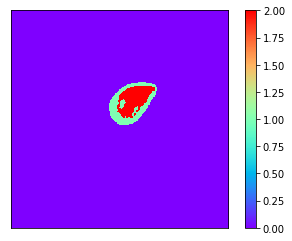

Number of background pixels: 143009
Number of myocardium pixels: 2235
Number of blood pixels: 2212
Total pixels: 147456


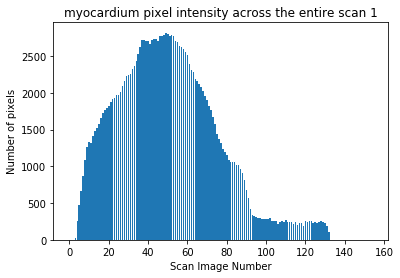

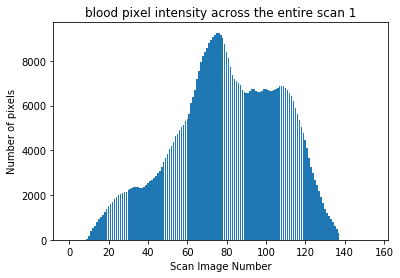

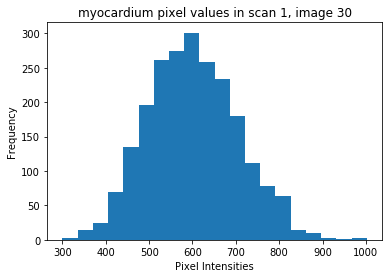

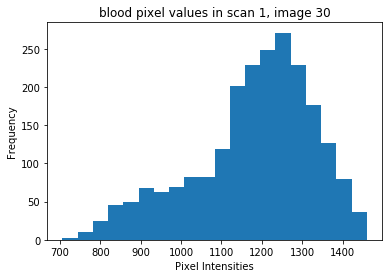

In [0]:
# 1) how many labelled pixels (either blood or myocardium) are contained in each image?
labelled_image = load_image(SCAN_NUMBER, IMAGE_NUMBER, 'lab')
show_image(labelled_image, cmap='rainbow')
rows, columns = labelled_image.shape

for tag, label in LABELS.items():
  num_labelled_pixels = get_num_labelled_pixels(image=labelled_image, label=label)
  print(f'Number of {tag} pixels: {num_labelled_pixels}')

print(f'Total pixels: {rows * columns}')

# 2) is the myocardium pixel intensity constant across the entire scan?
pixel_intensities_across_scan(scan_number=SCAN_NUMBER, label='myocardium')

# 3) is the blood pool pixel intensity constant across the entire scan?
pixel_intensities_across_scan(scan_number=SCAN_NUMBER, label='blood')

# 4) how much does the pixel intensity of the myocardium/blood vary within one single image
for label in ['myocardium', 'blood']:
  pixel_intensities_in_single_image(SCAN_NUMBER, IMAGE_NUMBER, label)

{
    "mean": 238,
    "min": 0,
    "max": 2831,
    "var": 140645,
    "std": 375,
    "labels": {
        "0": {
            "mean": 218,
            "min": 0,
            "max": 2831,
            "var": 128340,
            "std": 358
        },
        "1": {
            "mean": 600,
            "min": 300,
            "max": 1002,
            "var": 10657,
            "std": 103
        },
        "2": {
            "mean": 1179,
            "min": 706,
            "max": 1460,
            "var": 22424,
            "std": 149
        }
    }
}


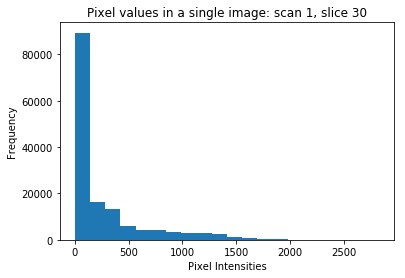

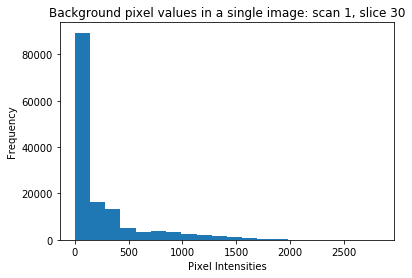

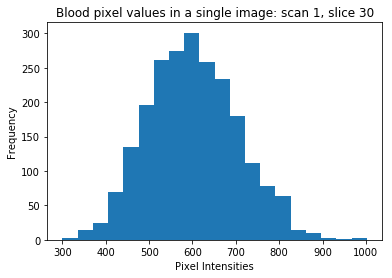

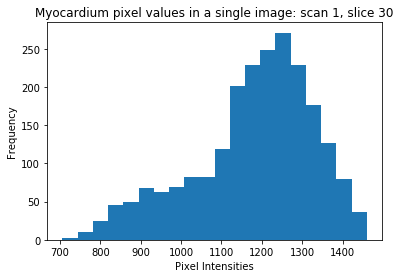

In [0]:
def get_stats(image): 
  """
  Grab statistics from an image
  """
  try: 
    return {
        'mean': int(np.mean(image)),
        'min': int(np.min(image)),
        'max': int(np.max(image)),
        'var': int(np.var(image)), # average of the squared differences from the mean
        'std': int(np.std(image)) # anything </> mean +- std is considered not normal
    }
  except ValueError: 
    return {}

def slice_statistics(scan_image, scan_label):
  """
  Grab statistics from an image and all the labels within an image
  """
  results = get_stats(image=scan_image)
  results['labels'] = {}

  for label in LABELS: 
    label_pixels = scan_image[scan_label == LABELS[label]]
    results['labels'][LABELS[label]] = get_stats(label_pixels)
    
  return results

# load scan image & label - get slice statistics from them
scan_image = load_image(scan_number=SCAN_NUMBER, slice_number=IMAGE_NUMBER, _type='img')
scan_label = load_image(scan_number=SCAN_NUMBER, slice_number=IMAGE_NUMBER, _type='lab')
results = slice_statistics(scan_image, scan_label)
print(json.dumps(results, indent=4))

# show histograms of a single image
show_histogram(scan_image.reshape((384*384, 1)),  
               x_label='Pixel Intensities',
               y_label='Frequency',
               title=f'Pixel values in a single image: scan {SCAN_NUMBER}, slice {IMAGE_NUMBER}')

show_histogram(scan_image[scan_label == 0],
               x_label='Pixel Intensities',
               y_label='Frequency',
               title=f'Background pixel values in a single image: scan {SCAN_NUMBER}, slice {IMAGE_NUMBER}')

show_histogram(scan_image[scan_label == 1],
               x_label='Pixel Intensities',
               y_label='Frequency',
               title=f'Blood pixel values in a single image: scan {SCAN_NUMBER}, slice {IMAGE_NUMBER}')

show_histogram(scan_image[scan_label == 2],
               x_label='Pixel Intensities',
               y_label='Frequency',
               title=f'Myocardium pixel values in a single image: scan {SCAN_NUMBER}, slice {IMAGE_NUMBER}')

## Task 2: Part 2

In [0]:
# grab statistics of all images in a particular scan
scan_images = get_images_by_scan(scan_number=SCAN_NUMBER)
scan_labels = get_images_by_scan(scan_number=SCAN_NUMBER, _type='lab')

scan_stats = []
for scan_image, scan_label in zip(scan_images, scan_labels): 
  scan_image = load_image_by_filename(scan_image)
  scan_label = load_image_by_filename(scan_label)
 
  stats = slice_statistics(scan_image, scan_label)
  scan_stats.append(stats)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [0]:
# grab mean of all image statistics in a particular scan
# combine the results into a single dictionary representing the entire scan
overall_scan_stats = {'mean': 0, 'max': 0, 'min': 0} 
for k in overall_scan_stats.keys():
  overall_scan_stats[k] = int(np.mean([image_stats[k] for image_stats in scan_stats]))

overall_label_stats = {}
for label in LABELS.values():
  overall_label_stats[label] = {}
  for k in overall_scan_stats.keys():
    overall_label_stats[label][k] = int(np.mean([image_stats['labels'][label][k] for image_stats in scan_stats if k in image_stats['labels'][label]]))

overall_scan_stats['labels'] = overall_label_stats
print(json.dumps(overall_scan_stats, indent=4))

{
    "mean": 220,
    "max": 2181,
    "min": 0,
    "labels": {
        "0": {
            "mean": 195,
            "max": 2152,
            "min": 0
        },
        "1": {
            "mean": 566,
            "max": 957,
            "min": 233
        },
        "2": {
            "mean": 1049,
            "max": 1560,
            "min": 585
        }
    }
}


## Task 3: Labelled Pixel Intensities

In this task you will create different views of the 3D data

The image below show the three primary planes of a 3D medical scans; these are called `Axial`, `Coronal` and `Saggital` planes. The DICOM files contain slices in only one of these three axis. In this task you will have to `stack` all the images together and `slice` them in the other two directions and display a couple of examples.

### Functionalities

1. create a function that takes as imput an iterable of images (2D numpy arrays) and create a voxel volume (3D numpy array)
2. create a function which takes a voxel volume, a slice index and an optional axis (`int`,  possible values =`[0, 1, 2, None]`) and returns the slice indexed by the index along the specified axis


<!-- <img src="https://i.imgur.com/cArtrtm.jpg" style="width: 400px; max-width: 20%; height: auto" title="GT superimposed over the scan Image" /> -->

In [0]:
HEIGHT, WIDTH = (384, 384)
PLANES = {
    'sagittal': 0,
    'axial': 1,
    'coronal': 2
}

In [0]:
def create_voxel_volume(scan_images):
  """
  Stack arrays in sequence depth wise (along third axis)
  """
  return np.dstack(scan_images)

def get_slice_along_axis(voxel_volume, slice_number, axis=0):
  """
  Slice the 3d numpy array (voxel volume) in a particular axis
  """
  if axis == 0:
    # sagittal
    return voxel_volume[:, :, slice_number]
  elif axis == 1:
    # axial
    return voxel_volume[:, slice_number, :]
  else: 
    # coronal
    return voxel_volume[slice_number, :, :]

In [0]:
# load all the images of a particular scan number
scan_image_files = get_images_by_scan(scan_number=SCAN_NUMBER)
combined_images = [load_image_by_filename(image_file) 
                   for image_file in scan_image_files]

3D scan shape: (384, 384, 155)


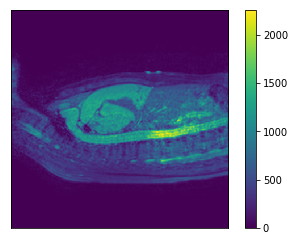

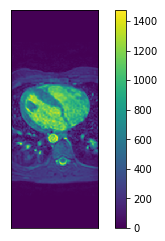

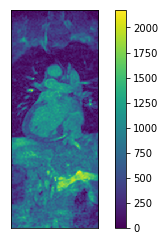

In [0]:
# stack the scan images together to create the 3d voxel volume
_3d_scan_image = create_voxel_volume(scan_images=combined_images)
assert(_3d_scan_image.shape == (HEIGHT, WIDTH, len(combined_images)))
print('3D scan shape:', _3d_scan_image.shape)

# run quick test - checking scan images are the same
image1 = load_image(1, 30, 'img')
image2 = _3d_scan_image[:, :, 30]
assert(np.array_equal(image1, image2))

# 3d scan image taken in sagittal plane
# slice the middle of each plane axis
(height, width, num_channels) = _3d_scan_image.shape
middle_sagittal = get_slice_along_axis(voxel_volume=_3d_scan_image, 
                                       slice_number=num_channels // 2, 
                                       axis=PLANES['sagittal'])

# horizontal plane
middle_axial = get_slice_along_axis(voxel_volume=_3d_scan_image,
                                    slice_number=width // 2,
                                    axis=PLANES['axial'])

# frontal plane
middle_coronal = get_slice_along_axis(voxel_volume=_3d_scan_image,
                                      slice_number=height // 2,
                                      axis=PLANES['coronal'])

show_image(middle_sagittal)
show_image(middle_axial)
show_image(middle_coronal)

## Task 4: Segment anatomy

In this task you will develop your own segmentation algorithm

### Task Definition

Decide on a anatomy component of your choice and create an algorithm to segment it.

Display somehow the results.

### Helpful notes

1. the easiest thing to segment is the full body!
2. the second easiest thing is the lungs 
3. cardiac pixels are very difficult!
4. if you're up for a challenge, you can give it a go tho! there should be enough data in the GT to even train a small CNN if you're up for that!
5. regardless of the anatomy of choice, the easiest thing is to create a two tiered algorithm: one where you derive a rough segmentation, and one where you somehow refine the segmentation by looking a simple properties (for example a group of 3 pixels disconnected from everything else is probably just noise and not very likely to be part of the anatomy...) 

## Threshold based segmentation: 

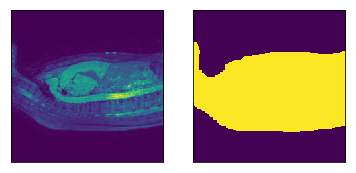

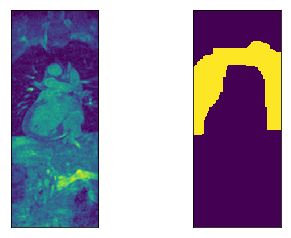

In [0]:
from skimage.measure import label 
from skimage.morphology import opening, closing

def morph(image, _type, kernel=5): 
  """
  Apply morphology to the results of the segmentations
  """
  if _type == 'open': 
    # erosion followed by dilation - useful in removing noise
    return opening(image, np.ones((kernel, kernel)))
  else:
    # Dilation followed by Erosion - useful in closing small holes inside the foreground objects
    return closing(image, np.ones((kernel, kernel)))

def segment_fullbody(image, threshold): 
  """
  Segment the full body using a particular threshold value
  """
  thresholded_image = (image > threshold) * 255
  
  return thresholded_image

def segment_lungs(image): 
  """
  Segment the lungs using multiple threshold conditions
  """
  thresholded_image = ((lungs_image > 10) & (lungs_image < 100)) * 255
  
  return thresholded_image

# 1) segment the full body
full_body_image = middle_sagittal
segmented_full_body = segment_fullbody(full_body_image, threshold=50)
segmented_full_body = morph(segmented_full_body, 'open', 10) # refinement step
segmented_full_body = morph(segmented_full_body, 'close', 20) # refinement step
show_images([full_body_image, segmented_full_body], [None, None], 1, 2)

# 2) segment the lungs
lungs_image = middle_coronal
segmented_lungs_image = segment_lungs(lungs_image)
segmented_lungs_image = morph(segmented_lungs_image, 'close', 30) # refinement step
segmented_lungs_image = morph(segmented_lungs_image, 'open', 10) # refinement step
labels = label(segmented_lungs_image)
largest_connected_component = labels == np.argmax(np.bincount(labels.flat)[1:]) + 1 # get the largest connected component i.e. lungs
show_images([lungs_image, largest_connected_component], [None, None], 1, 2)

## Cluster based Segmentation (K-means):

In [0]:
import numpy as np

# seed the randomiser
RANDOM_SEED = 2019


class KMeans:
    """
    Class to represent the kmeans clustering algorithm
    """

    def __init__(self, data, num_centroids, debug=False):
        """
        Constructor - initialise the centroids randomly
        """
        self.data = data
        self.num_rows = data.shape[0]
        self.num_centroids = num_centroids
        self.debug = debug
        self.centroids = self.init()

    def init(self):
        """
        Initialise the centroids randomly
        Seed the randomiser to get reproducible results
        """
        np.random.seed(RANDOM_SEED)

        random_indexes = np.random.permutation(self.num_rows)[:self.num_centroids]

        if self.debug:
            print('Random indexes', random_indexes)

        # return the data sample at these random indexes
        return self.data[random_indexes]

    def euclidean_distance(self):
        """
        Calculate distance metric between the data and each centroid
        """
        distance_matrix = np.empty((self.num_rows, self.num_centroids))

        # for each centroid, find the euclidean distance between each
        # data sample and centroid
        for i, centroid in enumerate(self.centroids):
            distance_matrix[:, i] = np.linalg.norm(self.data - centroid, axis=1)

        return distance_matrix

    def fit(self):
        """
        Run the clustering algorithm
        """
        iteration_number = 0

        if self.debug:
            print('Initial centroids', self.centroids, self.centroids.shape)

        # continue until convergence
        while True:
            distance_matrix = self.euclidean_distance()

            # get indexes of centroids where data assigned by minimum distance
            assignment_indexes = np.argmin(distance_matrix, axis=1)

            # the new centroids are then calculated by the average of the data samples
            # that are assigned to them
            new_centroids = np.empty(self.centroids.shape)
            for i in range(self.num_centroids):
                new_centroids[i] = self.data[assignment_indexes == i].mean(0)

            # if the previous centroids == new centroids, convergence!
            if np.all(new_centroids == self.centroids):
                break

            # if not, update the centroids
            self.centroids = new_centroids

            # update the iterations
            iteration_number += 1

            if self.debug:
                print('Iteration:', iteration_number)

        return assignment_indexes

Shape: (147456, 1)
Random indexes [70682 60501 27472 84312]
Initial centroids [[ 391]
 [1307]
 [  14]
 [ 217]] (4, 1)
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Centroids after: [[ 785.12951485]
 [1328.23410819]
 [  21.3338028 ]
 [ 322.46474512]]


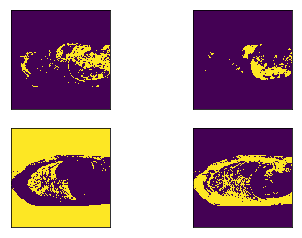

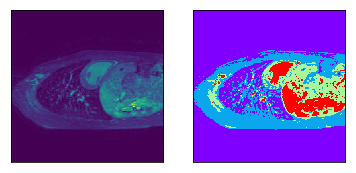

In [0]:
# load image file and flatten to 1 dimension
image = load_image(SCAN_NUMBER, IMAGE_NUMBER, _type='img')
height, width = image.shape
data = np.array([image.flatten()]).T
print('Shape:', data.shape)

# run the clustering algorithm
kmeans = KMeans(data=data, num_centroids=4, debug=True)
assignment_indexes = kmeans.fit()
print('Centroids after:', kmeans.centroids)

# assign parts of the image to their centroid values
new_image = np.copy(data)
segmented_images = []
for i in range(kmeans.num_centroids): 
  # give the pixel the centroids colour
  new_image[assignment_indexes == i] = kmeans.centroids[i]
  
  # separate the segmented parts and display them
  segmented_image = np.zeros(data.shape)
  segmented_image[assignment_indexes == i] = kmeans.centroids[i]
  segmented_images.append(segmented_image.reshape((width, height)))

new_image = new_image.reshape((width, height))

show_images(segmented_images, [None, None, None, None], 2, 2)
show_images([image, new_image], [None, 'rainbow'], 1, 2)

## CNN Segmentation (extract cardiac pixels):

In [0]:
!pip install -U segmentation-models

Requirement already up-to-date: segmentation-models in /usr/local/lib/python3.6/dist-packages (0.2.1)


In [0]:
import os
import pandas as pd
import random
import skimage
import segmentation_models as sm
from keras import backend as K
from keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.losses import categorical_crossentropy
from keras.metrics import categorical_accuracy
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 16
RANDOM_SEED = 2019
HEIGHT, WIDTH, CHANNELS = (384, 384, 3)

os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)


class CNN:
    """
    Class representing convolutional neural network
    """

    def __init__(self):
        """
        Constructor
        """
        pass
      
    def load_model_by_name(self, model_name): 
        """
        Load a saved model from disk using name
        """
        return load_model(os.path.join(BASE_DIRECTORY, model_name), custom_objects={'dice_coef_loss': self.dice_coef_loss})
      
    def show_images(self, images, cmaps):
        """
        Plot multiple images on the 1 figure with subplots and colour maps
        """
        def subplot(count, image, cmap, alpha=None): 
            plt.subplot(1, 3, count)
            plt.imshow(image, cmap=cmap, alpha=alpha)
            plt.xticks([])
            plt.yticks([])

        plt.figure()
        for i, image in enumerate(images):
            subplot(i+1, images[i], cmaps[i])

        subplot(3, images[0], cmaps[0])
        subplot(3, images[1], cmaps[1], alpha=0.5)
      
    def test(self, model, test_images): 
        """
        Test the model on images
        """
        for image in test_images: 
            loaded_image = load_image_by_filename(image)
            image = skimage.color.gray2rgb(loaded_image)
            result = model.predict(np.array([image]))[0] # output is 4d 
            result = skimage.color.rgb2gray(result)
            cnn.show_images([loaded_image, result], cmaps=[None, 'rainbow'])
        
    def train(self, num_epochs):
        """
        Train the CNN over a number of epochs
        Use a pretrained network with ImageNet weights
        """
        # get the training and validation generators
        training_gen, validation_gen = self._get_generators()

        # load the data
        (training_images, training_labels), (val_images, val_labels), test_images = self._get_data()

        data_directory = os.path.join(BASE_DIRECTORY, 'data')

        # use my own custom generator instead for training and validation
        training_gen = self._get_custom_generator(training_images, training_labels, training=True)
        val_gen = self._get_custom_generator(val_images, val_labels, training=False)

        # load the model - 3 classes representing background, blood and myocardium pixels
        model = sm.Unet('resnet34', classes=3, activation='sigmoid', input_shape=(384, 384, 3), encoder_weights='imagenet')
        model.summary()

        # create an optimiser
        optimiser = Adam(lr=1E-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

        # specifiy loss function, optimiser and metrics
        model.compile(loss=self.dice_coef_loss,
                      optimizer=optimiser,
                      metrics=['accuracy'])

        # checkpoints for the model
        checkpoint = ModelCheckpoint('weights', monitor='accuracy',
                                     verbose=1, save_best_only=True, mode='max')

        earlystopping = EarlyStopping(monitor='accuracy', verbose=1,
                                      min_delta=0.01, patience=3, mode='max')

        callbacks_list = [checkpoint, earlystopping]

        # begin the training
        results = model.fit_generator(training_gen, epochs=num_epochs,
                                      steps_per_epoch=(len(training_images) // BATCH_SIZE),
                                      validation_data=val_gen,
                                      validation_steps=(len(val_images) // BATCH_SIZE),
                                      callbacks=callbacks_list)
        model.save(os.path.join(BASE_DIRECTORY, 'model.h5'))
        
        return model, test_images

    def _get_generators(self):
        """
        Use Keras built-in generators (currently not used) for data augmentation
        """
        trainining_generator = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
        validation_generator = ImageDataGenerator(rescale=1./255)

        return trainining_generator, validation_generator

    def _get_custom_generator(self, image_paths, label_paths, training): 
        """
        Returns custom generator for images
        """
        # batch size matrices for recording the data
        images = np.empty([BATCH_SIZE, HEIGHT, WIDTH, CHANNELS])
        labels = np.empty([BATCH_SIZE, HEIGHT, WIDTH, 1])
        c = 0

        # continuously yield images and groundtruth labels for the CNN
        while True:
            if training:
                # shuffle training data only
                permutation = np.random.permutation(len(image_paths))
                image_paths = np.asarray(image_paths)[permutation]
                label_paths = np.asarray(label_paths)[permutation]

            # load batch size images and labels
            for i in range(c, c + BATCH_SIZE):
                try: 
                    image = load_image_by_filename(image_paths[i])
                    label = load_image_by_filename(label_paths[i])

                    image = skimage.color.gray2rgb(image)
                    label = np.expand_dims(label, axis=2)

                    images[i-c] = image
                    labels[i-c] = label
                except IndexError:
                    break
            
            # reset counter if required
            if(c + BATCH_SIZE >= len(image_paths)):
                c = 0
            else:
                c += BATCH_SIZE
 

            yield images, labels
            
      
    def _get_data(self):
        """
        Load the training data
        """
        image_files = get_directory_contents(directory_path=DATA_DIRECTORY)

        # get image files
        scan_images = [image_file for image_file in image_files if 'img' in image_file]
        scan_labels = [image_file for image_file in image_files if 'lab' in image_file]

        # sort image files by multiple conditions - first scan number, then slice number
        scan_images.sort(key=lambda x: (x.split('_')[1], x.split('_')[2]))
        scan_labels.sort(key=lambda x: (x.split('_')[1], x.split('_')[2]))

        # some images in the dataset don't have labels
        # use these as test images instead
        new_scan_images = []
        new_scan_labels = []
        test_images = []
        for scan_image in scan_images:
            found = False
            for scan_label in scan_labels:
                if '_'.join(scan_image.split('_')[:3]) == '_'.join(scan_label.split('_')[:3]):
                    new_scan_images.append(scan_image)
                    new_scan_labels.append(scan_label)
                    found = True
                    break

            # if no match found for an image, use it as a test image
            if not found:
                test_images.append(scan_image)

        assert(len(new_scan_images) == len(new_scan_labels))

        # shuffle both lists at the same time
        random.seed(RANDOM_SEED)
        combined = list(zip(new_scan_images, new_scan_labels))
        random.shuffle(combined)

        # unzip
        new_scan_images, new_scan_labels = zip(*combined)

        # 80/20 split into training and validation image and label sets
        train_split = int(0.8 * len(new_scan_images))

        training_images = list(new_scan_images[:train_split])
        val_images = list(new_scan_images[train_split:len(new_scan_images)])

        training_labels = list(new_scan_labels[:train_split])
        val_labels = list(new_scan_labels[train_split:len(new_scan_labels)])

        return (training_images, training_labels), (val_images, val_labels), test_images
      
    def dice_coef(self, y_true, y_pred, smooth=1):
        """
        Calculate dice loss coefficient
        """
        intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
        return (2. * intersection + smooth) / (K.sum(K.square(y_true),-1) + K.sum(K.square(y_pred),-1) + smooth)

    def dice_coef_loss(self, y_true, y_pred):
        """
        Dice loss function for training
        """
        return 1 - self.dice_coef(y_true, y_pred)
      

cnn = CNN()

In [0]:
# comment this out for training
# model, test_images = cnn.train(num_epochs=20)

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


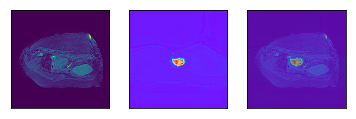

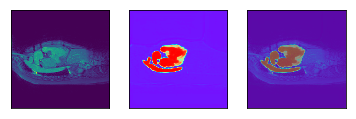

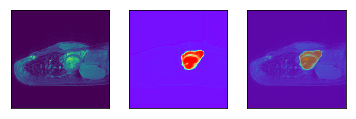

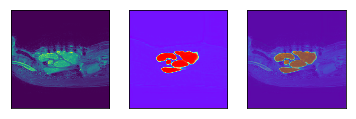

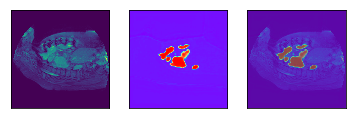

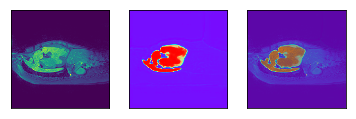

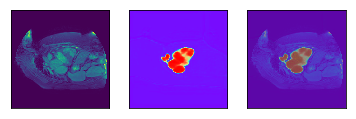

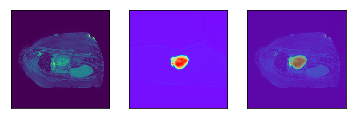

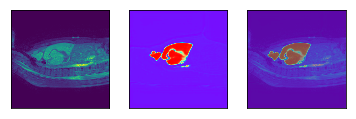

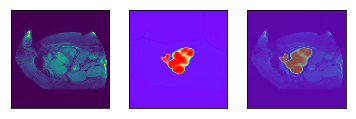

In [0]:
# testing
model = cnn.load_model_by_name('model_2.h5')

# test the model on the test images first
try:
  cnn.test(model, test_images)
except NameError: 
  pass

# test the model on 10 random images - shuffle beforehand
more_test_images = get_files_by_type(_type='img')
random.shuffle(more_test_images)
cnn.test(model, more_test_images[:10])